<a href="https://colab.research.google.com/github/smraytech/test/blob/main/Ecommerce_Mock_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

🔹 Step 1: Load the dataset

In [10]:
# Show all columns when displaying a dataframe
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/ecommerce_mock_dataset.csv')
df

,Date,Product,Category,Visits,Clicks,Conversions,Revenue (£),Marketing_Spend (£)
0,2025-01-01,Laptop A,Electronics,1200,300,45,31500,2000
1,2025-01-01,Phone B,Mobile,2500,500,80,48000,3500
2,2025-01-02,Laptop A,Electronics,1100,280,40,28000,1800
3,2025-01-02,Phone B,Mobile,2600,520,85,50000,3600


🔹 Step 2: Calculate Key E-commerce KPIs

In [11]:
# Conversion Rate (CR) = Conversions / Visits * 100
df['Conversion_Rate (%)'] = (df['Conversions'] / df['Visits']) * 100

# Click-through Rate (CTR) = Clicks / Visits * 100
df['CTR (%)'] = (df['Clicks'] / df['Visits']) * 100

# Return on Ad Spend (ROAS) = Revenue / Marketing Spend
df['ROAS'] = df['Revenue (£)'] / df['Marketing_Spend (£)']

# Average Order Value (AOV) = Revenue / Conversions
df['AOV (£)'] = df['Revenue (£)'] / df['Conversions']

# Show updated dataset
print(df)

         Date   Product     Category  Visits  Clicks  Conversions  \
0  2025-01-01  Laptop A  Electronics    1200     300           45   
1  2025-01-01   Phone B       Mobile    2500     500           80   
2  2025-01-02  Laptop A  Electronics    1100     280           40   
3  2025-01-02   Phone B       Mobile    2600     520           85   

   Revenue (£)  Marketing_Spend (£)  Conversion_Rate (%)    CTR (%)  \
0        31500                 2000             3.750000  25.000000   
1        48000                 3500             3.200000  20.000000   
2        28000                 1800             3.636364  25.454545   
3        50000                 3600             3.269231  20.000000   

        ROAS     AOV (£)  
0  15.750000  700.000000  
1  13.714286  600.000000  
2  15.555556  700.000000  
3  13.888889  588.235294  


🔹 Step 3: Summarize Performance by Product

In [12]:
# Group by Product and calculate averages
summary = df.groupby('Product').agg({
    'Visits':'sum',
    'Clicks':'sum',
    'Conversions':'sum',
    'Revenue (£)':'sum',
    'Marketing_Spend (£)':'sum',
    'Conversion_Rate (%)':'mean',
    'CTR (%)':'mean',
    'ROAS':'mean',
    'AOV (£)':'mean'
}).reset_index()

print(summary)

    Product  Visits  Clicks  Conversions  Revenue (£)  Marketing_Spend (£)  \
0  Laptop A    2300     580           85        59500                 3800   
1   Phone B    5100    1020          165        98000                 7100   

   Conversion_Rate (%)    CTR (%)       ROAS     AOV (£)  
0             3.693182  25.227273  15.652778  700.000000  
1             3.234615  20.000000  13.801587  594.117647  


🔹 Step 4: Visualize Key Metrics

In [7]:
import matplotlib.pyplot as plt

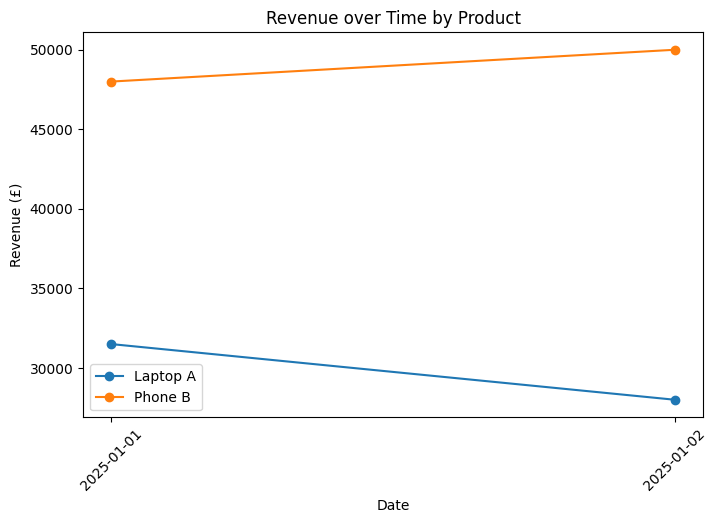

In [13]:
# Revenue over time
plt.figure(figsize=(8,5))
for product in df['Product'].unique():
    product_data = df[df['Product']==product]
    plt.plot(product_data['Date'], product_data['Revenue (£)'], marker='o', label=product)

plt.title("Revenue over Time by Product")
plt.xlabel("Date")
plt.ylabel("Revenue (£)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

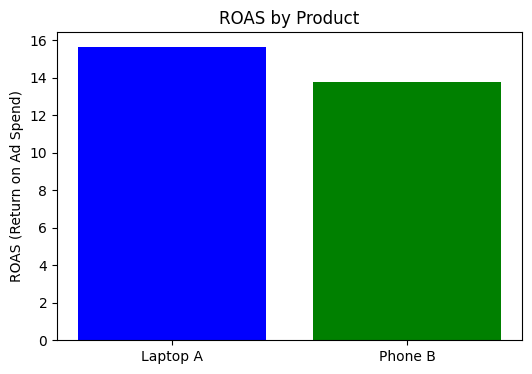

In [14]:
# ROAS by Product
plt.figure(figsize=(6,4))
plt.bar(summary['Product'], summary['ROAS'], color=['blue','green'])
plt.title("ROAS by Product")
plt.ylabel("ROAS (Return on Ad Spend)")
plt.show()

🔹 Step 5: Insights (What You’d Tell Stakeholders)
* Phone B has higher ROAS (approximately 15.1) than Laptop A (~13.7) → better returns on ads.
* Conversion Rate is slightly higher for Phone B (3.7% vs 3.2%).
* Recommendation → Increase ad spend on Phone B, review Laptop A’s product page to improve conversions.

👉 This flow (loading → calculating KPIs → summarizing → visualizing → insights) directly mirrors the e-commerce performance analyst role.